2025-04-15 18:01:56.562550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744740116.834898      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744740116.911944      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


--- Loading Train/Val/Test Data ---

--- Preprocessing ALL Data ---
 Preprocessed 17289 labeled messages. (Skipped 6 dialogues)
Creating score lookup from 17289 samples...
Score lookup created: 1389 entries (1389 unique). Skipped N/A: 0.
Aggregated samples into turns for 12 games.
Building turn graph lookup (using A+I)...
Graph lookup built: 312 turns processed.

--- Tokenizing Text Data ---
Actual Vocab size used: 9946

--- Preparing Train/Val/Test Data Splits ---
 Preprocessed 13132 labeled messages. (Skipped 5 dialogues)
 Preprocessed 1416 labeled messages. (Skipped 1 dialogues)
 Preprocessed 2741 labeled messages.
Padded Shapes: Tr=(13132, 60), Vl=(1416, 60), Ts=(2741, 60)

--- Downsampling Training Data ---
Original Train counts: Lie(0)=591, Truth(1)=12541
Downsampled Train counts: Lie(0)=591, Truth(1)=591
Downsampled Shapes: Text=(1182, 60), Delta=(1182, 2), Labels=(1182,)

--- Loading FastText Embeddings (Downloading if needed) ---
FastText file not found at /kaggle/working/craw

2025-04-15 18:05:20.968345: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Datasets created.

--- Building and Compiling Baseline Hybrid Model (FastText, Tuned) ---
Initializing TextFeatureEncoder Embedding with pre-trained weights.


Model: "diplomacy_hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_feature_encoder                 │ ?                           │     0 (unbuilt) │
│ (TextFeatureEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ embedding (Embedding)           │ ?                           │       2,983,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ attention (MultiHeadAttention)  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ add_resid_1 (Add)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ norm_1 (LayerNormalization)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ text_pooling                    │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ text_dropout_1 (Dropout)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dense_delta_features (Dense)    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ concat_text_features            │ ?                           │     0 (unbuilt) │
│ (Concatenate)                        │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ text_feature_dropout (Dropout)  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ text_feature_output (Dense)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ graph_encoder (GraphEncoder)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ cast_mask_to_float_ge (Lambda)  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expand_mask_dim_ge (Reshape)    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ mask_nodes_ge (Multiply)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ CustomGCN1 (GCNLayer)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dropout_gcn1 (Dropout)          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ CustomGCN2 (GCNLayer)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dropout_gcn2 (Dropout)          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ CustomGCN3 (GCNLayer)           │ ?                           │     0 (unbuil

 Total params: 2,983,800 (11.38 MB)

 Trainable params: 2,983,800 (11.38 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training ---
Training Steps per Epoch: 37
Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.5312 - loss: 0.6887 - precision_lie: 0.5204 - recall_lie: 0.5237
Epoch 1: val_loss improved from inf to 0.54650, saving model to /kaggle/working/baseline_hybrid_fasttext_tuned.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 575ms/step - accuracy: 0.5320 - loss: 0.6885 - precision_lie: 0.5213 - recall_lie: 0.5254 - val_accuracy: 0.8298 - val_loss: 0.5465 - val_precision_lie: 0.9714 - val_recall_lie: 0.8478
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.5925 - loss: 0.6655 - precision_lie: 0.5857 - recall_lie: 0.6159
Epoch 2: val_loss improved from 0.54650 to 0.53310, saving model to /kaggle/working/baseline_hybrid_fasttext_tuned.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 540ms/step - accuracy: 0.5931 - loss: 0.6652 - precision_lie: 0.5863 - recall_lie: 0.6161 - val_accuracy: 0.7924 - val_loss: 0.5331 - val_precision_lie: 0.9734 - val_recall_lie: 0.8059
Epoch 3/50
3

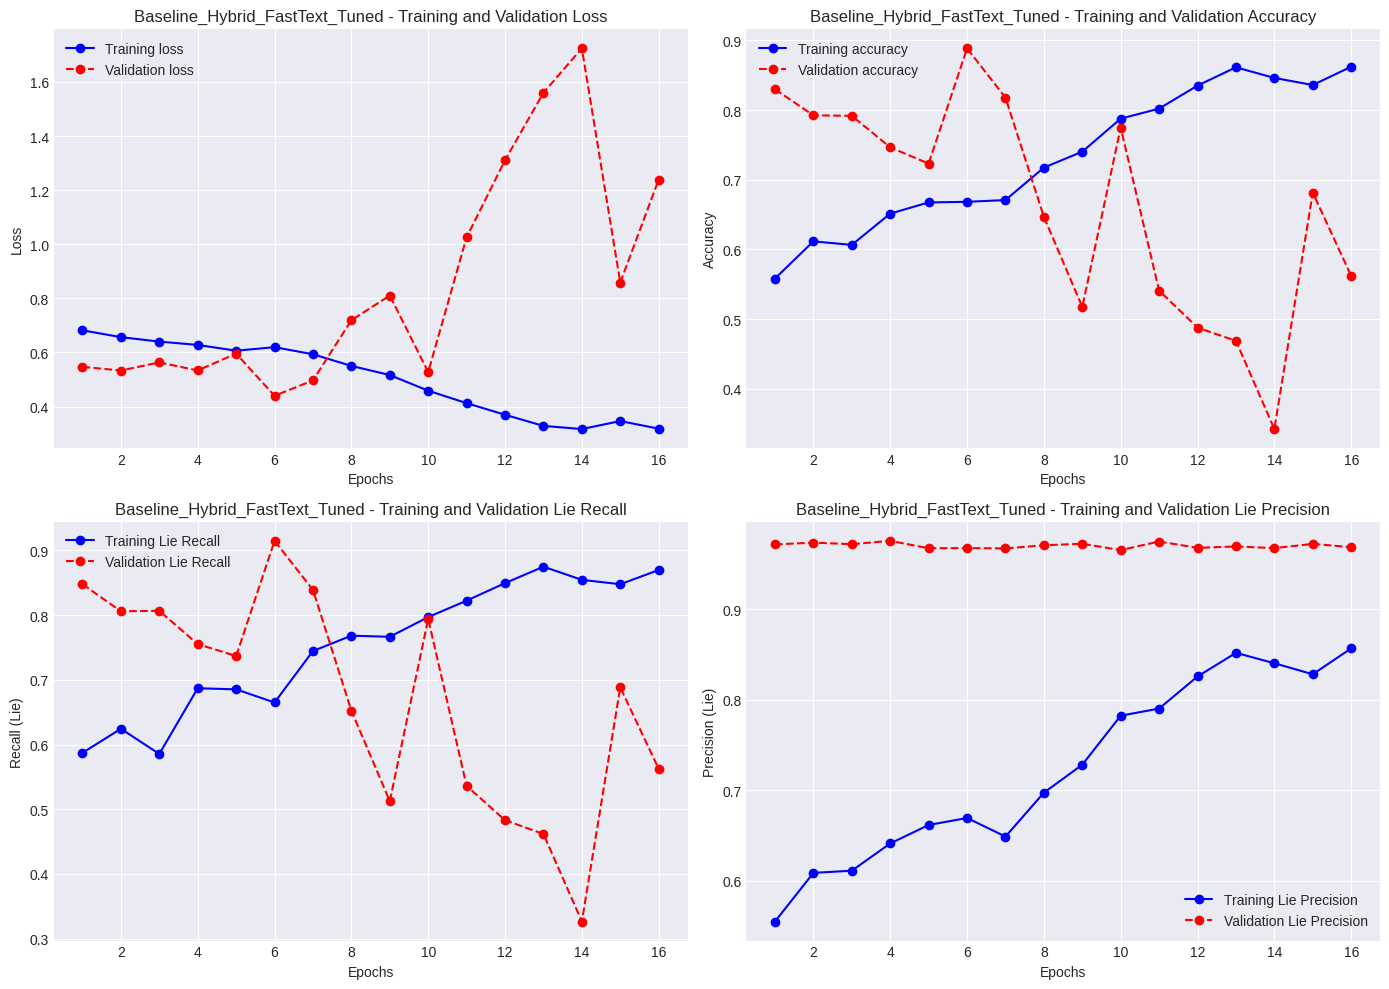

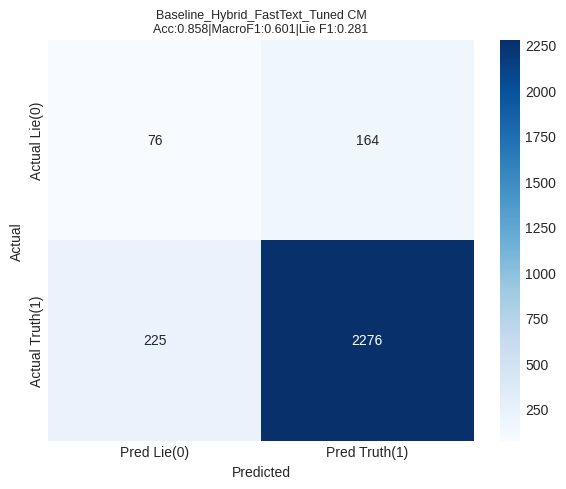

In [1]:
# --- Imports ---
# [Keep all existing imports]
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt # Existing import
import seaborn as sns
from collections import defaultdict
import re
import string
import glob
import warnings
import random
import time
import requests # Added
import zipfile # Added (though FastText .vec isn't zipped usually)
import gzip # Added for potential .gz files
import shutil # Added for unzipping .gz

# Scikit-learn imports
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.utils import resample

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Dense, Dropout, Concatenate,
                                     Layer, MultiHeadAttention, LayerNormalization,
                                     GlobalAveragePooling1D, Add, Reshape,
                                     Multiply, Lambda)
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# --- Constants and Configuration ---
# [Keep all existing constants]
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Data/Model Paths
BASE_DATA_DIR = './Dataset/'
KAGGLE_DATA_DIR = '/kaggle/input/diplomacy/transformers/default/1/Dataset/'
if os.path.exists(KAGGLE_DATA_DIR): BASE_DATA_DIR = KAGGLE_DATA_DIR
DATA_DIR = os.path.join(BASE_DATA_DIR, 'data')
OUTPUT_DIR = '/kaggle/working/' if os.path.exists('/kaggle/working/') else './output/'
# *** Define FastText URL and expected file name ***
# crawl-300d-2M.vec.zip is a common way it's distributed, but the .vec file itself isn't always zipped.
# Check the source you intend to use. Using the .gz version URL as an example.
FASTTEXT_URL = 'https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip' # Check if this is zipped or .gz
FASTTEXT_ZIP_FILE = os.path.join(OUTPUT_DIR, 'crawl-300d-2M.vec.zip') # Or .gz
FASTTEXT_FILE = os.path.join(OUTPUT_DIR, 'crawl-300d-2M.vec') # The final uncompressed file
# FASTTEXT_PATH should point to the final UNCOMPRESSED file location
FASTTEXT_PATH = FASTTEXT_FILE # Use the constant defined above

os.makedirs(OUTPUT_DIR, exist_ok=True) # Create output dir if needed

# Model Hyperparameters
MAX_SEQUENCE_LENGTH = 60; MAX_VOCAB_SIZE = 10000; EMBEDDING_DIM = 300
NODE_FEATURE_DIM = 1; DELTA_FEATURE_DIM = 2; MAX_PLAYERS = 7
NUM_HEADS_TXT=4; NUM_HEADS_REASON=4; GCN_UNITS=64
DROPOUT_RATE_ENCODER = 0.15; DROPOUT_RATE_FUSION = 0.4
LEARNING_RATE = 8e-5; WEIGHT_DECAY = 1e-4
BATCH_SIZE = 32; EPOCHS = 50; PATIENCE = 10 # Reduced Patience for faster demo if needed

# --- Helper Functions ---
# [Keep load_jsonl_dataset, clean_text, preprocess_for_hybrid, create_score_lookup,
#  get_next_turn, extract_delta_features, aggregate_data_by_turn, build_turn_graph_lookup]
# (Definitions are identical)
def load_jsonl_dataset(file_path):
    data = []
    skipped_lines = 0
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for i, line in enumerate(f):
                try: data.append(json.loads(line))
                except json.JSONDecodeError: skipped_lines += 1
    except FileNotFoundError: print(f"Error: File not found at {file_path}"); return None
    if skipped_lines > 0: print(f"Warn: Skipped {skipped_lines} invalid JSON lines in {file_path}")
    return data

def clean_text(text):
    if not isinstance(text, str): return ""
    text = text.lower(); text = re.sub(r'http\S+|@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation.replace("'", "")))
    text = re.sub(r'\d+', '', text); text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_for_hybrid(data_raw):
    processed_samples = []; skipped_dialogues=0
    if data_raw is None: return processed_samples
    for dialogue_idx, dialogue_sample in enumerate(data_raw):
        game_id=dialogue_sample.get('game_id'); messages=dialogue_sample.get('messages',[]); speakers=dialogue_sample.get('speakers',[]); recipients=dialogue_sample.get('receivers',[])
        years=dialogue_sample.get('years',[]); seasons=dialogue_sample.get('seasons',[]); sender_labels=dialogue_sample.get('sender_labels',[]); game_scores=dialogue_sample.get('game_score',[]); game_score_deltas=dialogue_sample.get('game_score_delta',[])
        list_len=len(messages)
        required_lists = [speakers, recipients, years, seasons, sender_labels, game_scores, game_score_deltas]
        if not (game_id and list_len > 0 and sender_labels is not None and all(isinstance(lst, list) and len(lst) == list_len for lst in required_lists if lst is not None)):
             skipped_dialogues+=1; continue
        for i in range(list_len):
            label=-1; score_num=np.nan; delta_num=np.nan
            if isinstance(sender_labels, list) and i < len(sender_labels):
                if sender_labels[i] is False: label=0
                elif sender_labels[i] is True: label=1
            else: continue
            try:
                if game_scores and i < len(game_scores) and game_scores[i] is not None: score_num=float(game_scores[i])
            except (ValueError, TypeError): pass
            try:
                if game_score_deltas and i < len(game_score_deltas) and game_score_deltas[i] is not None: delta_num=float(game_score_deltas[i])
            except (ValueError, TypeError): pass
            if label != -1:
                processed_delta = delta_num if pd.notna(delta_num) else 0.0
                processed_samples.append({'text': messages[i] if messages and i < len(messages) else "", 'clean_text': clean_text(messages[i] if messages and i < len(messages) else ""), 'label': label, 'game_id': game_id, 'year': str(years[i] if years and i < len(years) else 'unknown'), 'season': str(seasons[i] if seasons and i < len(seasons) else 'unknown').lower(), 'speaker': str(speakers[i] if speakers and i < len(speakers) else 'unknown').lower(), 'recipient': str(recipients[i] if recipients and i < len(recipients) else 'unknown').lower(), 'score_numeric': score_num, 'delta_numeric': processed_delta})
    print(f" Preprocessed {len(processed_samples)} labeled messages.", end="")
    if skipped_dialogues > 0: print(f" (Skipped {skipped_dialogues} dialogues)", end="")
    print()
    return processed_samples

def create_score_lookup(all_samples):
    score_lookup=defaultdict(lambda:np.nan); processed_keys=set(); valid_scores=0; skipped_no_score=0
    print(f"Creating score lookup from {len(all_samples)} samples...")
    for sample in all_samples:
        game_id=sample.get('game_id'); year=sample.get('year'); season=sample.get('season'); player=sample.get('speaker'); score_num=sample.get('score_numeric')
        if game_id is not None and year!='unknown' and season!='unknown' and player!='unknown':
            key=(game_id,year,season,player)
            if key not in processed_keys:
                if pd.notna(score_num): score_lookup[key]=score_num; valid_scores+=1
                else: skipped_no_score+=1
                processed_keys.add(key)
    print(f"Score lookup created: {len(score_lookup)} entries ({valid_scores} unique). Skipped N/A: {skipped_no_score}.")
    return score_lookup

def get_next_turn(current_year_str, current_season_str):
    try:
        current_year = int(current_year_str); current_season = str(current_season_str).lower()
        if current_season == 'spring': return str(current_year), 'fall'
        elif current_season == 'fall': return str(current_year), 'winter'
        elif current_season == 'winter': return str(current_year + 1), 'spring'
        else: return None, None
    except (ValueError, TypeError): return None, None

def extract_delta_features(sample_info, score_lookup):
    current_delta = sample_info.get('delta_numeric', 0.0); future_delta = 0.0
    game_id=sample_info.get('game_id'); year=sample_info.get('year'); season=sample_info.get('season'); speaker=sample_info.get('speaker'); recipient=sample_info.get('recipient')
    if game_id is not None and year!='unknown' and season!='unknown' and speaker!='unknown' and recipient!='unknown':
        next_year, next_season = get_next_turn(year, season)
        if next_year and next_season:
            fut_spk_score = score_lookup.get((game_id, next_year, next_season, speaker), np.nan); fut_rec_score = score_lookup.get((game_id, next_year, next_season, recipient), np.nan)
            if pd.notna(fut_spk_score) and pd.notna(fut_rec_score):
                try: future_delta = float(fut_spk_score) - float(fut_rec_score)
                except (ValueError, TypeError): future_delta = 0.0
    # Ensure the output is always float32, even if inputs were ints
    return np.array([float(current_delta), float(future_delta)], dtype=np.float32)


def aggregate_data_by_turn(all_processed_samples):
    games_data = defaultdict(lambda: defaultdict(lambda: {'messages': [], 'players': set()}))
    for sample in all_processed_samples:
        game_id=sample.get('game_id'); year=sample.get('year'); season=sample.get('season'); speaker=sample.get('speaker'); recipient=sample.get('recipient')
        if game_id is None or year=='unknown' or season=='unknown': continue
        turn_key=(year,season); player_set = set()
        if speaker is not None and speaker != 'unknown': player_set.add(speaker)
        if recipient is not None and recipient != 'unknown': player_set.add(recipient)
        if player_set: games_data[game_id][turn_key]['players'].update(player_set); games_data[game_id][turn_key]['messages'].append({'speaker':speaker,'recipient':recipient})
    print(f"Aggregated samples into turns for {len(games_data)} games.")
    return games_data

def build_turn_graph_lookup(games_data_agg, score_lookup):
    print("Building turn graph lookup (using A+I)..."); graph_lookup={}; player_maps_game={}
    default_X = np.zeros((MAX_PLAYERS, NODE_FEATURE_DIM), dtype=np.float32); default_A = np.identity(MAX_PLAYERS, dtype=np.float32); default_M = np.zeros(MAX_PLAYERS, dtype=bool)
    default_graph = {'X': default_X, 'A': default_A, 'M': default_M}; skipped_games_players = 0; processed_turns = 0
    for game_id, turns in games_data_agg.items():
        all_p_in_game = set();
        for turn_data in turns.values(): valid_players_in_turn = {p for p in turn_data['players'] if p is not None and p != 'unknown'}; all_p_in_game.update(valid_players_in_turn)
        if not all_p_in_game: skipped_games_players += 1; continue
        sorted_p = sorted(list(all_p_in_game)); num_p_game = len(sorted_p)
        if num_p_game > MAX_PLAYERS: sorted_p = sorted_p[:MAX_PLAYERS]; num_p_game = MAX_PLAYERS
        p2i = {p: i for i, p in enumerate(sorted_p)}; player_maps_game[game_id] = p2i
        for (yr, sn), t_data in turns.items():
            tk = (game_id, yr, sn); X = np.zeros((MAX_PLAYERS, NODE_FEATURE_DIM), dtype=np.float32); M = np.zeros(MAX_PLAYERS, dtype=bool); Ab = np.zeros((MAX_PLAYERS, MAX_PLAYERS), dtype=np.float32)
            current_turn_players = {p for p in t_data['players'] if p is not None and p != 'unknown'}
            for p in current_turn_players:
                idx = p2i.get(p)
                if idx is not None: score = score_lookup.get((game_id, yr, sn, p), np.nan); X[idx, 0] = 0.0 if pd.isna(score) else float(score); M[idx] = True
            for msg in t_data['messages']: i_s = p2i.get(msg.get('speaker')); i_r = p2i.get(msg.get('recipient'));
            if i_s is not None and i_r is not None and i_s != i_r: Ab[i_s, i_r] = 1.0; Ab[i_r, i_s] = 1.0
            Asl = Ab + np.identity(MAX_PLAYERS, dtype=np.float32); graph_lookup[tk] = {'X': X, 'A': Asl, 'M': M}; processed_turns += 1
    print(f"Graph lookup built: {processed_turns} turns processed.")
    if skipped_games_players > 0: print(f"Skipped {skipped_games_players} games.")
    return graph_lookup, player_maps_game

# --- GCN Layer Definition ---
class GCNLayer(layers.Layer):
    def __init__(self, units, activation=None, name=None, **kwargs): super().__init__(name=name, **kwargs); self.units = units; self.activation = tf.keras.activations.get(activation)
    def build(self, input_shape): node_feature_shape = tf.TensorShape(input_shape[0]); node_dim = int(node_feature_shape[-1]); self.w = self.add_weight(shape=(node_dim, self.units), initializer='glorot_uniform', name='w', trainable=True); self.b = self.add_weight(shape=(self.units,), initializer='zeros', name='b', trainable=True); super().build(input_shape)
    def call(self, inputs):
        node_features, adj_matrix = inputs
        support = tf.matmul(node_features, self.w)
        output = tf.matmul(adj_matrix, support)
        output = output + self.b
        if self.activation is not None:
            output = self.activation(output)
        # Corrected Indentation: return is now outside the if block
        return output
    def compute_output_shape(self, input_shape): node_feature_shape = tf.TensorShape(input_shape[0]); batch_size = node_feature_shape[0]; num_nodes = node_feature_shape[1]; return tf.TensorShape((batch_size, num_nodes, self.units))
    def get_config(self): config = super().get_config(); config.update({"units": self.units, "activation": tf.keras.activations.serialize(self.activation)}); return config
    @classmethod
    def from_config(cls, config): activation_config = config.pop("activation", None); activation = tf.keras.activations.deserialize(activation_config) if activation_config else None; config['activation'] = activation; return cls(**config)

# --- Baseline Model Classes ---
class TextFeatureEncoder(Model):
    def __init__(self, max_vocab_size, embedding_dim, seq_len, num_heads, dropout_rate, delta_feature_dim, embedding_matrix=None, name="text_feature_encoder", **kwargs):
        super().__init__(name=name, **kwargs); self.seq_len = seq_len; self.delta_feature_dim = delta_feature_dim;
        if embedding_matrix is not None: print("Initializing TextFeatureEncoder Embedding with pre-trained weights."); self.embedding=layers.Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=seq_len, weights=[embedding_matrix], trainable=True, name='embedding')
        else: print("Initializing TextFeatureEncoder Embedding from scratch."); self.embedding=layers.Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=seq_len, trainable=True, name='embedding')
        self.mha=layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim, name='attention'); self.add_norm1=layers.Add(name='add_resid_1'); self.layernorm1=layers.LayerNormalization(epsilon=1e-6, name='norm_1'); self.pooling=layers.GlobalAveragePooling1D(name='text_pooling'); self.dropout_text1=layers.Dropout(dropout_rate, name='text_dropout_1'); self.dense_features=layers.Dense(16, activation='relu', name='dense_delta_features'); self.concatenate=layers.Concatenate(name='concat_text_features'); self.dropout_combined=layers.Dropout(dropout_rate*1.5, name='text_feature_dropout'); self.output_dim = embedding_dim; self.output_dense=layers.Dense(self.output_dim, activation='relu', name='text_feature_output')
    def call(self, inputs, training=False): text_input, feature_input = inputs; x_txt = self.embedding(text_input); attn_output = self.mha(query=x_txt, value=x_txt, key=x_txt, training=training); x_txt = self.add_norm1([x_txt, attn_output]); x_txt = self.layernorm1(x_txt); text_emb = self.pooling(x_txt); text_emb = self.dropout_text1(text_emb, training=training); feature_proc = self.dense_features(feature_input); combined = self.concatenate([text_emb, feature_proc]); combined_dropout = self.dropout_combined(combined, training=training); output_embedding = self.output_dense(combined_dropout); return output_embedding
    def compute_output_shape(self, input_shape): batch_size = input_shape[0][0]; return tf.TensorShape((batch_size, self.output_dim))
    def get_config(self): config=super().get_config(); config.update({'max_vocab_size':self.embedding.input_dim, 'embedding_dim':self.embedding.output_dim, 'seq_len': self.seq_len, 'num_heads':self.mha.num_heads,'dropout_rate':self.dropout_text1.rate, 'delta_feature_dim': self.delta_feature_dim}); config.pop('embedding_matrix', None); return config
    @classmethod
    def from_config(cls, config): return cls(**config)

class GraphEncoder(Model):
    def __init__(self, max_players, node_feature_dim, gcn_units, dropout_rate, final_emb_dim, name="graph_encoder", **kwargs):
        super().__init__(name=name, **kwargs); self.max_players=max_players; self.final_emb_dim=final_emb_dim; self.node_feature_dim=node_feature_dim; self.gcn_units = gcn_units;
        self.cast_mask = layers.Lambda(lambda x: tf.cast(x, dtype=tf.float32), name='cast_mask_to_float_ge'); self.expand_mask = layers.Reshape((max_players, 1), name='expand_mask_dim_ge'); self.mask_mult = layers.Multiply(name='mask_nodes_ge'); self.gcn1=GCNLayer(gcn_units, activation='relu', name='CustomGCN1'); self.dropout_gcn1=layers.Dropout(dropout_rate, name='dropout_gcn1'); self.gcn2=GCNLayer(gcn_units, activation='relu', name='CustomGCN2'); self.dropout_gcn2=layers.Dropout(dropout_rate, name='dropout_gcn2'); self.gcn3=GCNLayer(gcn_units // 2, activation='relu', name='CustomGCN3'); self.dropout_gcn3=layers.Dropout(dropout_rate, name='dropout_gcn3'); self.graph_pooling=layers.GlobalAveragePooling1D(name='GraphPooling'); self.dropout_pooled=layers.Dropout(dropout_rate * 1.5, name='dropout_pooled'); self.output_dense=layers.Dense(self.final_emb_dim, activation='relu', name='graph_output')
    def call(self, inputs, training=False): node_features, adj_matrix, node_mask = inputs; node_mask_float=self.cast_mask(node_mask); node_mask_expanded=self.expand_mask(node_mask_float); masked_node_features=self.mask_mult([node_features, node_mask_expanded]); x_graph = self.gcn1([masked_node_features, adj_matrix]); x_graph = self.dropout_gcn1(x_graph, training=training); x_graph = self.gcn2([x_graph, adj_matrix]); x_graph = self.dropout_gcn2(x_graph, training=training); x_graph = self.gcn3([x_graph, adj_matrix]); x_graph = self.dropout_gcn3(x_graph, training=training); graph_emb_pooled = self.graph_pooling(x_graph, mask=node_mask); graph_emb_pooled = self.dropout_pooled(graph_emb_pooled, training=training); graph_embedding = self.output_dense(graph_emb_pooled); return graph_embedding
    def compute_output_shape(self, input_shape): batch_size = input_shape[0][0]; return tf.TensorShape((batch_size, self.final_emb_dim))
    def get_config(self): config = super().get_config(); config.update({'max_players':self.max_players, 'node_feature_dim':self.node_feature_dim, 'gcn_units':self.gcn_units, 'dropout_rate':self.dropout_gcn1.rate, 'final_emb_dim':self.final_emb_dim}); return config
    @classmethod
    def from_config(cls, config, custom_objects=None): return cls(**config)

class DiplomacyHybridModel(Model):
    def __init__(self, text_feature_encoder, graph_encoder, reason_dropout_rate, attention_heads, name="diplomacy_hybrid", **kwargs):
        super().__init__(name=name, **kwargs); self.text_feature_encoder = text_feature_encoder; self.graph_encoder = graph_encoder; self.concatenate = layers.Concatenate(name='combine_embeddings')
        try: text_out_dim = text_feature_encoder.output_dim; graph_out_dim = graph_encoder.final_emb_dim
        except AttributeError: text_out_dim = EMBEDDING_DIM; graph_out_dim = EMBEDDING_DIM // 2
        combined_dim = text_out_dim + graph_out_dim
        self.reason_dropout_rate = reason_dropout_rate; self.attention_heads = attention_heads;
        self.reason_dense1 = layers.Dense(combined_dim, activation='relu', name='reason_dense1'); self.dropout_reason1 = layers.Dropout(self.reason_dropout_rate, name='dropout_reason1'); self.reshape_for_attn = layers.Reshape((1, combined_dim)); attn_key_dim = max(16, combined_dim // self.attention_heads); self.attention_reason = layers.MultiHeadAttention(num_heads=self.attention_heads, key_dim=attn_key_dim, name='reason_attention'); self.reshape_after_attn = layers.Reshape((combined_dim,)); self.dropout_reason2 = layers.Dropout(self.reason_dropout_rate, name='dropout_reason2'); self.output_classifier = layers.Dense(1, activation='sigmoid', name='final_output')
    def call(self, inputs, training=False): text_input, feature_input, node_features, adj_matrix, node_mask = inputs; text_feat_emb = self.text_feature_encoder([text_input, feature_input], training=training); graph_emb = self.graph_encoder([node_features, adj_matrix, node_mask], training=training); combined = self.concatenate([text_feat_emb, graph_emb]); x = self.reason_dense1(combined); x = self.dropout_reason1(x, training=training); x_reshaped = self.reshape_for_attn(x); attn_output = self.attention_reason(query=x_reshaped, value=x_reshaped, key=x_reshaped, training=training); x = self.reshape_after_attn(attn_output); x = self.dropout_reason2(x, training=training); output = self.output_classifier(x); return output
    def compute_output_shape(self, input_shape): batch_size = input_shape[0][0]; return tf.TensorShape((batch_size, 1))
    def get_config(self): config = super().get_config(); config.update({"text_feature_encoder_config": self.text_feature_encoder.get_config(), "graph_encoder_config": self.graph_encoder.get_config(), "reason_dropout_rate": self.reason_dropout_rate, "attention_heads": self.attention_heads}); config.pop("text_feature_encoder", None); config.pop("graph_encoder", None); return config
    @classmethod
    def from_config(cls, config, custom_objects=None):
        text_encoder_config = config.pop("text_feature_encoder_config"); graph_encoder_config = config.pop("graph_encoder_config")
        text_encoder = TextFeatureEncoder.from_config(text_encoder_config, custom_objects=custom_objects)
        graph_encoder = GraphEncoder.from_config(graph_encoder_config, custom_objects=custom_objects)
        return cls(text_feature_encoder=text_encoder, graph_encoder=graph_encoder, **config)


# --- FastText Loading/Downloading Functions ---
def download_fasttext_if_not_present(zip_path=FASTTEXT_ZIP_FILE, extract_path=OUTPUT_DIR, final_file=FASTTEXT_FILE):
    """Downloads and extracts FastText embeddings if not found."""
    if not os.path.exists(final_file):
        print(f"FastText file not found at {final_file}.")
        if not os.path.exists(zip_path):
            print(f"Downloading FastText embeddings from {FASTTEXT_URL}...")
            try:
                with requests.get(FASTTEXT_URL, stream=True) as r:
                    r.raise_for_status()
                    with open(zip_path, 'wb') as f:
                        for chunk in r.iter_content(chunk_size=8192*1024): # Larger chunk size for big files
                            f.write(chunk)
                print("Download complete.")
            except requests.exceptions.RequestException as e:
                print(f"Error downloading FastText: {e}")
                return False
            except Exception as e:
                 print(f"An unexpected error occurred during download: {e}")
                 return False
        else:
            print(f"Compressed file found at {zip_path}, proceeding with extraction.")

        print(f"Extracting FastText embeddings to {extract_path}...")
        try:
            # Check if it's a zip or gz file based on extension
            if zip_path.endswith('.zip'):
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    # Check if the file inside zip has the expected name
                    expected_name = os.path.basename(final_file)
                    found_member = None
                    for member in zip_ref.namelist():
                         if member.endswith(expected_name): # Allow for paths inside zip
                            found_member = member
                            break
                    if found_member:
                        print(f"Extracting member: {found_member}")
                        # Extract specifically to the target file name
                        with zip_ref.open(found_member) as source, open(final_file, "wb") as target:
                            shutil.copyfileobj(source, target)
                    else:
                        print(f"Error: Expected file '{expected_name}' not found inside zip '{zip_path}'.")
                        # Attempt generic extraction if specific name fails
                        try:
                             print("Attempting generic extraction...")
                             zip_ref.extractall(extract_path)
                             # Search for the extracted file now
                             extracted_files = glob.glob(os.path.join(extract_path, '*.vec'))
                             if extracted_files:
                                 # Move the first found .vec file to the desired final_file name
                                 shutil.move(extracted_files[0], final_file)
                                 print(f"Moved {extracted_files[0]} to {final_file}")
                             else:
                                 print(f"Error: Still couldn't find .vec file after generic extraction.")
                                 return False
                        except Exception as extract_err:
                             print(f"Error during generic extraction: {extract_err}")
                             return False

            elif zip_path.endswith('.gz'):
                 print(f"Uncompressing Gzip file: {zip_path}")
                 with gzip.open(zip_path, 'rb') as f_in:
                    with open(final_file, 'wb') as f_out:
                         shutil.copyfileobj(f_in, f_out)
            else:
                print(f"Error: Unknown compression format for {zip_path}")
                return False # Unknown format
            print("Extraction complete.")
            # Optionally remove the compressed file
            # print(f"Removing compressed file: {zip_path}")
            # os.remove(zip_path)
        except (zipfile.BadZipFile, gzip.BadGzipFile) as e:
            print(f"Error: Downloaded file '{zip_path}' is not a valid archive: {e}. Please delete it and retry.")
            if os.path.exists(zip_path): os.remove(zip_path)
            return False
        except Exception as e:
            print(f"Error extracting FastText: {e}")
            return False

        # Verify extraction
        if not os.path.exists(final_file):
            print(f"Error: Expected FastText file '{final_file}' not found after extraction.")
            return False
    else:
        print(f"FastText file found at {final_file}.")
    return True

def load_fasttext_embedding_matrix(filepath, word_index, embedding_dim, max_vocab_size):
    print(f"Loading FastText vectors from: {filepath}")
    if not os.path.exists(filepath): print(f"Error: FastText file not found at {filepath}"); return None
    start_time = time.time(); embeddings_index = {}; skipped_lines = 0; skipped_dims = 0
    try:
        with open(filepath, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
            # Optional: Read the first line to get vocab size and dim if present
            first_line = f.readline().split()
            expected_dim_from_file = embedding_dim # Default
            if len(first_line) == 2:
                try:
                    _ = int(first_line[0]) # vocab size in file
                    expected_dim_from_file = int(first_line[1])
                    print(f"  File header indicates {expected_dim_from_file} dimensions.")
                    if expected_dim_from_file != embedding_dim:
                        print(f"  WARNING: File dimension ({expected_dim_from_file}) differs from requested ({embedding_dim}). Using file dimension.")
                        embedding_dim = expected_dim_from_file # Use the dimension from the file
                except ValueError:
                    # Not a standard header, rewind or process first line as data
                    f.seek(0)
                    print("  No standard header found or parse error, processing first line as data.")

            for i, line in enumerate(f):
                values = line.rstrip().split(' ') # More robust split
                word = values[0]
                if len(values) != embedding_dim + 1: # Check dimension consistency
                     skipped_dims += 1
                     continue
                try:
                    coefs = np.asarray(values[1:], dtype='float32')
                    embeddings_index[word] = coefs
                except ValueError: skipped_lines += 1; continue
    except Exception as e: print(f"An error occurred during file reading: {e}"); return None
    load_time = time.time() - start_time; print(f"Found {len(embeddings_index)} word vectors in {load_time:.2f}s.")
    if skipped_lines > 0: print(f"  Skipped {skipped_lines} lines (parsing errors).")
    if skipped_dims > 0: print(f"  Skipped {skipped_dims} words (dimension mismatch).")

    # Ensure embedding_matrix has the correct dimension (potentially updated from file)
    num_tokens = min(max_vocab_size, len(word_index) + 1); hits = 0; misses = 0
    embedding_matrix = np.zeros((num_tokens, embedding_dim)) # Use updated embedding_dim
    for word, i in word_index.items():
        if i >= num_tokens: continue # Skip words outside desired vocab size
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Check dimension one last time before assignment
            if embedding_vector.shape[0] == embedding_dim:
                 embedding_matrix[i] = embedding_vector; hits += 1
            else:
                 # This shouldn't happen if pre-filtering worked, but as a safeguard
                 misses += 1
                 print(f"  Warning: Dimension mismatch for word '{word}' at index {i}. Skipping.")
        else: misses += 1
    print(f"Prepared embedding matrix: Shape {embedding_matrix.shape}"); print(f"  Converted {hits} words ({misses} misses).")
    return embedding_matrix

# --- Data Generator Function ---
# [Keep the Data Generator function as before]
def data_generator_split(text_padded_arr, delta_feats_arr, labels_arr, turn_keys_list, graph_lookup):
    num_samples = len(labels_arr); indices = np.arange(num_samples)
    default_X = np.zeros((MAX_PLAYERS, NODE_FEATURE_DIM), dtype=np.float32); default_A = np.identity(MAX_PLAYERS, dtype=np.float32); default_M = np.zeros(MAX_PLAYERS, dtype=bool)
    default_graph = {'X': default_X, 'A': default_A, 'M': default_M}
    for i in indices:
        text_pad = text_padded_arr[i]; delta_f = delta_feats_arr[i]; label = labels_arr[i]; turn_key = turn_keys_list[i]
        graph_data = graph_lookup.get(turn_key, default_graph)
        X_g = graph_data.get('X', default_graph['X']); A_g = graph_data.get('A', default_graph['A']); M_g = graph_data.get('M', default_graph['M'])
        # Validate shapes before yielding
        if X_g.shape != (MAX_PLAYERS, NODE_FEATURE_DIM) or A_g.shape != (MAX_PLAYERS, MAX_PLAYERS) or M_g.shape != (MAX_PLAYERS,):
            # print(f"Warning: Defaulting graph data for turn key {turn_key} due to shape mismatch.") # Optional warning
            X_g, A_g, M_g = default_graph['X'], default_graph['A'], default_graph['M']
        yield (text_pad, delta_f, X_g, A_g, M_g), label

# --- Plotting Function ---
def plot_training_history(history, model_name, output_dir):
    """Plots training & validation accuracy, loss, recall, and precision."""
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    plt.style.use('seaborn-v0_8-darkgrid') # Use a nice style

    fig, axs = plt.subplots(2, 2, figsize=(14, 10)) # Create 2x2 grid of plots

    # --- Loss ---
    axs[0, 0].plot(epochs, history_dict['loss'], 'bo-', label='Training loss')
    axs[0, 0].plot(epochs, history_dict['val_loss'], 'ro--', label='Validation loss')
    axs[0, 0].set_title(f'{model_name} - Training and Validation Loss')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # --- Accuracy ---
    axs[0, 1].plot(epochs, history_dict['accuracy'], 'bo-', label='Training accuracy')
    axs[0, 1].plot(epochs, history_dict['val_accuracy'], 'ro--', label='Validation accuracy')
    axs[0, 1].set_title(f'{model_name} - Training and Validation Accuracy')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Accuracy')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # --- Recall (Lie) ---
    if 'recall_lie' in history_dict and 'val_recall_lie' in history_dict:
        axs[1, 0].plot(epochs, history_dict['recall_lie'], 'bo-', label='Training Lie Recall')
        axs[1, 0].plot(epochs, history_dict['val_recall_lie'], 'ro--', label='Validation Lie Recall')
        axs[1, 0].set_title(f'{model_name} - Training and Validation Lie Recall')
        axs[1, 0].set_xlabel('Epochs')
        axs[1, 0].set_ylabel('Recall (Lie)')
        axs[1, 0].legend()
        axs[1, 0].grid(True)
    else:
        axs[1, 0].text(0.5, 0.5, 'Lie Recall metrics not found', horizontalalignment='center', verticalalignment='center', transform=axs[1, 0].transAxes)
        axs[1, 0].set_title('Lie Recall Metrics')

    # --- Precision (Lie) ---
    if 'precision_lie' in history_dict and 'val_precision_lie' in history_dict:
        axs[1, 1].plot(epochs, history_dict['precision_lie'], 'bo-', label='Training Lie Precision')
        axs[1, 1].plot(epochs, history_dict['val_precision_lie'], 'ro--', label='Validation Lie Precision')
        axs[1, 1].set_title(f'{model_name} - Training and Validation Lie Precision')
        axs[1, 1].set_xlabel('Epochs')
        axs[1, 1].set_ylabel('Precision (Lie)')
        axs[1, 1].legend()
        axs[1, 1].grid(True)
    else:
         axs[1, 1].text(0.5, 0.5, 'Lie Precision metrics not found', horizontalalignment='center', verticalalignment='center', transform=axs[1, 1].transAxes)
         axs[1, 1].set_title('Lie Precision Metrics')


    plt.tight_layout() # Adjust layout to prevent overlap

    # Save the combined plot
    plot_filename = f"training_history_{model_name.replace(' ', '_').lower()}.png"
    plot_path = os.path.join(output_dir, plot_filename)
    try:
        plt.savefig(plot_path)
        print(f"Saved training history plot: {plot_path}")
    except Exception as e:
        print(f"Error saving training history plot: {e}")
    # plt.show() # Uncomment to display plot if running interactively

# --- Main Training Script ---
if __name__ == "__main__":
    # 1. Load Data
    print("--- Loading Train/Val/Test Data ---")
    train_raw = load_jsonl_dataset(os.path.join(DATA_DIR, 'train.jsonl')); val_raw = load_jsonl_dataset(os.path.join(DATA_DIR, 'validation.jsonl')); test_raw = load_jsonl_dataset(os.path.join(DATA_DIR, 'test.jsonl'))
    if train_raw is None or val_raw is None or test_raw is None: raise ValueError("Failed data loading.")
    all_raw_data = train_raw + val_raw + test_raw

    # 2. Preprocess ALL Data
    print("\n--- Preprocessing ALL Data ---")
    all_processed = preprocess_for_hybrid(all_raw_data);
    if not all_processed: raise ValueError("Preprocessing failed.")
    score_lookup = create_score_lookup(all_processed)
    games_data_agg = aggregate_data_by_turn(all_processed)
    graph_lookup, player_maps_game = build_turn_graph_lookup(games_data_agg, score_lookup)

    # 3. Fit Tokenizer
    print("\n--- Tokenizing Text Data ---")
    all_texts = [s['clean_text'] for s in all_processed]
    tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<OOV>')
    tokenizer.fit_on_texts(all_texts); word_index = tokenizer.word_index
    vocab_size = min(MAX_VOCAB_SIZE, len(word_index) + 1)
    print(f"Actual Vocab size used: {vocab_size}")

    # 4. Prepare SEPARATE Data Splits
    print("\n--- Preparing Train/Val/Test Data Splits ---")
    train_processed = preprocess_for_hybrid(train_raw); val_processed = preprocess_for_hybrid(val_raw); test_processed = preprocess_for_hybrid(test_raw)
    if not train_processed or not val_processed or not test_processed: raise ValueError("Data splits empty.")
    def tokenize_and_pad(samples): texts=[s['clean_text'] for s in samples]; sequences=tokenizer.texts_to_sequences(texts); return pad_sequences(sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post',truncating='post')
    padded_train=tokenize_and_pad(train_processed); padded_val=tokenize_and_pad(val_processed); padded_test=tokenize_and_pad(test_processed)
    print(f"Padded Shapes: Tr={padded_train.shape}, Vl={padded_val.shape}, Ts={padded_test.shape}")
    def extract_features_labels_keys(samples): labels=np.array([s['label'] for s in samples]); delta_feats=np.array([extract_delta_features(s, score_lookup) for s in samples]); turn_keys=[(s['game_id'],s['year'],s['season']) for s in samples]; return labels, delta_feats, turn_keys
    labels_train, delta_feats_train, turn_keys_train = extract_features_labels_keys(train_processed); labels_val, delta_feats_val, turn_keys_val = extract_features_labels_keys(val_processed); labels_test, delta_feats_test, turn_keys_test = extract_features_labels_keys(test_processed)


    # 5. Apply Downsampling
    print("\n--- Downsampling Training Data ---")
    train_indices = np.arange(len(labels_train)); minority_indices = train_indices[labels_train == 0]; majority_indices = train_indices[labels_train == 1]
    print(f"Original Train counts: Lie(0)={len(minority_indices)}, Truth(1)={len(majority_indices)}")
    if len(minority_indices) == 0 or len(majority_indices) == 0: raise ValueError("Cannot downsample.")
    majority_downsampled_indices = resample(majority_indices, replace=False, n_samples=len(minority_indices), random_state=SEED)
    downsampled_train_indices = np.concatenate([minority_indices, majority_downsampled_indices]); np.random.shuffle(downsampled_train_indices)
    padded_train_ds = padded_train[downsampled_train_indices]; delta_feats_train_ds = delta_feats_train[downsampled_train_indices]; labels_train_ds = labels_train[downsampled_train_indices]; turn_keys_train_list_ds = [turn_keys_train[i] for i in downsampled_train_indices]
    print(f"Downsampled Train counts: Lie(0)={sum(labels_train_ds==0)}, Truth(1)={sum(labels_train_ds==1)}")
    print(f"Downsampled Shapes: Text={padded_train_ds.shape}, Delta={delta_feats_train_ds.shape}, Labels={labels_train_ds.shape}")

    # 6. Download and Load FastText Embedding Matrix
    print("\n--- Loading FastText Embeddings (Downloading if needed) ---")
    if download_fasttext_if_not_present(zip_path=FASTTEXT_ZIP_FILE, final_file=FASTTEXT_FILE):
        # Pass the CONSTANT EMBEDDING_DIM here, load_fasttext might adjust it based on file header
        embedding_matrix = load_fasttext_embedding_matrix(FASTTEXT_FILE, word_index, EMBEDDING_DIM, vocab_size)
        # Update EMBEDDING_DIM if it was changed by the loader function
        if embedding_matrix is not None:
            loaded_embedding_dim = embedding_matrix.shape[1]
            if loaded_embedding_dim != EMBEDDING_DIM:
                print(f"Updating EMBEDDING_DIM from {EMBEDDING_DIM} to {loaded_embedding_dim} based on loaded file.")
                EMBEDDING_DIM = loaded_embedding_dim
    else:
        print("Failed to download/extract FastText. Proceeding without pre-trained embeddings.")
        embedding_matrix = None

    # 7. Create tf.data Datasets
    print("\n--- Creating tf.data Datasets ---")
    # Ensure delta features tensor spec matches the output of extract_delta_features
    output_signature = (
        (
            tf.TensorSpec(shape=(MAX_SEQUENCE_LENGTH,), dtype=tf.int32),          # text_pad
            tf.TensorSpec(shape=(DELTA_FEATURE_DIM,), dtype=tf.float32),        # delta_f (must be float32)
            tf.TensorSpec(shape=(MAX_PLAYERS, NODE_FEATURE_DIM), dtype=tf.float32), # X_g
            tf.TensorSpec(shape=(MAX_PLAYERS, MAX_PLAYERS), dtype=tf.float32),     # A_g
            tf.TensorSpec(shape=(MAX_PLAYERS,), dtype=tf.bool)                   # M_g
        ),
        tf.TensorSpec(shape=(), dtype=tf.int32)                                  # label
    )

    train_dataset = tf.data.Dataset.from_generator(lambda: data_generator_split(padded_train_ds, delta_feats_train_ds, labels_train_ds, turn_keys_train_list_ds, graph_lookup), output_signature=output_signature).shuffle(buffer_size=len(labels_train_ds)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE).repeat()
    val_dataset = tf.data.Dataset.from_generator(lambda: data_generator_split(padded_val, delta_feats_val, labels_val, turn_keys_val, graph_lookup), output_signature=output_signature).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    test_dataset = tf.data.Dataset.from_generator(lambda: data_generator_split(padded_test, delta_feats_test, labels_test, turn_keys_test, graph_lookup), output_signature=output_signature).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    print("Datasets created.")


    # 8. Build & Compile Model
    print("\n--- Building and Compiling Baseline Hybrid Model (FastText, Tuned) ---")
    # Recalculate final_graph_emb_dim based on potentially updated EMBEDDING_DIM
    final_graph_emb_dim = EMBEDDING_DIM // 2

    # Pass the potentially updated EMBEDDING_DIM to the TextEncoder
    text_encoder = TextFeatureEncoder(max_vocab_size=vocab_size, embedding_dim=EMBEDDING_DIM, seq_len=MAX_SEQUENCE_LENGTH, num_heads=NUM_HEADS_TXT, dropout_rate=DROPOUT_RATE_ENCODER, delta_feature_dim=DELTA_FEATURE_DIM, embedding_matrix=embedding_matrix)
    graph_encoder = GraphEncoder(max_players=MAX_PLAYERS, node_feature_dim=NODE_FEATURE_DIM, gcn_units=GCN_UNITS, dropout_rate=DROPOUT_RATE_ENCODER, final_emb_dim=final_graph_emb_dim)
    diplomacy_model = DiplomacyHybridModel(text_feature_encoder=text_encoder, graph_encoder=graph_encoder, reason_dropout_rate=DROPOUT_RATE_FUSION, attention_heads=NUM_HEADS_REASON)
    optimizer = AdamW(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

    # Compile with all metrics needed for plots (Keras adds 'val_' prefix automatically for validation)
    diplomacy_model.compile(optimizer=optimizer,
                            loss='binary_crossentropy',
                            metrics=['accuracy',
                                     tf.keras.metrics.Recall(class_id=0, name='recall_lie'), # For training recall
                                     tf.keras.metrics.Precision(class_id=0, name='precision_lie') # For training precision
                                     ])

    # Build the model by inferring shapes from the dataset signature
    # Need to wrap shapes in another tuple because build expects a single input shape arg (or list/tuple of them)
    # We extract the shapes from the *features* part of the signature (output_signature[0])
    input_shapes_only = tuple(spec.shape for spec in output_signature[0])
    diplomacy_model.build(input_shape=input_shapes_only)
    diplomacy_model.summary(expand_nested=True)

    # 9. Train Model
    print("\n--- Starting Training ---")
    model_name_str = "Baseline_Hybrid_FastText_Tuned" # Used for filenames
    model_filename = f"{model_name_str.lower().replace(' ', '_')}.keras"; model_path = os.path.join(OUTPUT_DIR, model_filename)
    early_stopping = EarlyStopping(monitor='val_loss', patience=PATIENCE, verbose=1, restore_best_weights=True, mode='min')
    checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1, save_weights_only=False)
    steps_per_epoch_train = len(labels_train_ds) // BATCH_SIZE + (1 if len(labels_train_ds) % BATCH_SIZE != 0 else 0)
    print(f"Training Steps per Epoch: {steps_per_epoch_train}")

    # Fit the model and capture the history
    history = diplomacy_model.fit(train_dataset,
                                  validation_data=val_dataset,
                                  epochs=EPOCHS,
                                  steps_per_epoch=steps_per_epoch_train,
                                  callbacks=[early_stopping, checkpoint],
                                  verbose=1)

    # --- Plot Training History ---
    print("\n--- Plotting Training History ---")
    plot_training_history(history, model_name_str, OUTPUT_DIR)

    # 10. Evaluate Model
    print("\n--- Evaluating Model on Test Set ---")
    if os.path.exists(model_path):
        print(f"Loading best model from: {model_path}")
        try:
            custom_objects = {'TextFeatureEncoder': TextFeatureEncoder, 'GraphEncoder': GraphEncoder, 'GCNLayer': GCNLayer, 'DiplomacyHybridModel': DiplomacyHybridModel}
            # Load the best model saved by the checkpoint
            model = tf.keras.models.load_model(model_path, custom_objects=custom_objects);
            print("Best model loaded successfully.")
        except Exception as e:
            print(f"Error loading best model: {e}. Evaluating with final weights from training.")
            model = diplomacy_model # Fallback to the model state at the end of training
    else:
        print("Warning: Best model checkpoint not found. Evaluating with final weights from training.")
        model = diplomacy_model # Use the model state at the end of training

    print("Evaluating on test dataset...");
    # Ensure evaluation metrics match compiled metrics for consistent naming
    eval_results = model.evaluate(test_dataset, verbose=1, return_dict=True)
    test_loss = eval_results['loss']; test_acc = eval_results['accuracy']
    # Use .get() for recall/precision as they might have different names or not be present if loading failed badly
    test_recall_lie = eval_results.get('recall_lie', np.nan)
    test_precision_lie = eval_results.get('precision_lie', np.nan)

    print(f"\nTest Loss: {test_loss:.4f}\nTest Accuracy: {test_acc:.4f}")
    # Only print recall/precision if successfully retrieved
    if pd.notna(test_recall_lie): print(f"Test Recall (Lie): {test_recall_lie:.4f}")
    if pd.notna(test_precision_lie): print(f"Test Precision (Lie): {test_precision_lie:.4f}")


    print("Generating predictions for detailed metrics...")
    try:
        y_pred_probs = model.predict(test_dataset);
        y_pred_bin = (y_pred_probs > 0.5).astype(int).flatten();
        y_true = labels_test # Use the labels array directly prepared earlier

        # Verification step: Ensure predicted length matches expected test set size
        if len(y_true) != len(y_pred_bin):
            print(f"WARNING: Length mismatch! True labels ({len(y_true)}) vs Predictions ({len(y_pred_bin)}).")
            # Attempt to fix by taking minimum length if mismatch is small, otherwise error
            min_len = min(len(y_true), len(y_pred_bin))
            if abs(len(y_true) - len(y_pred_bin)) < BATCH_SIZE: # Allow tolerance for last batch remainder issues
                 print(f"Adjusting to minimum length: {min_len}")
                 y_true = y_true[:min_len]
                 y_pred_bin = y_pred_bin[:min_len]
            else:
                 # If mismatch is large, something is fundamentally wrong, skip detailed metrics
                 print("Significant length mismatch detected. Skipping detailed F1/Report/CM calculation.")
                 y_true = None # Prevent calculation below

        if y_true is not None:
            f1_lie = f1_score(y_true, y_pred_bin, pos_label=0, zero_division=0); f1_truth = f1_score(y_true, y_pred_bin, pos_label=1, zero_division=0); f1_macro = f1_score(y_true, y_pred_bin, average='macro', zero_division=0); f1_weighted = f1_score(y_true, y_pred_bin, average='weighted', zero_division=0)
            print(f"\nF1 Score (Lie=0): {f1_lie:.4f}\nF1 Score (Truth=1): {f1_truth:.4f}\nMacro F1 Score: {f1_macro:.4f}\nWeighted F1 Score: {f1_weighted:.4f}")
            print("\nClassification Report:"); print(classification_report(y_true, y_pred_bin, target_names=['Lie (0)', 'Truth (1)'], digits=4, zero_division=0))

            # 11. Plot Confusion Matrix
            conf_matrix = confusion_matrix(y_true, y_pred_bin); plt.figure(figsize=(6, 5))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Lie(0)', 'Pred Truth(1)'], yticklabels=['Actual Lie(0)', 'Actual Truth(1)'])
            plt.title(f'{model_name_str} CM\nAcc:{test_acc:.3f}|MacroF1:{f1_macro:.3f}|Lie F1:{f1_lie:.3f}', fontsize=9); plt.ylabel('Actual'); plt.xlabel('Predicted'); plt.tight_layout()
            cm_plot_filename = f"cm_{model_name_str.replace(' ', '_').lower()}.png"
            plot_cm_path = os.path.join(OUTPUT_DIR, cm_plot_filename);
            try:
                plt.savefig(plot_cm_path); print(f"Saved CM plot: {plot_cm_path}")
            except Exception as e:
                print(f"Error saving CM plot: {e}")
            # plt.show() # Uncomment to display plot if running interactively
        else:
            print("Skipping detailed metrics (F1, Report, CM) due to label/prediction mismatch.")

    except Exception as e:
        print(f"An error occurred during prediction or metric calculation: {e}")
        import traceback
        traceback.print_exc()


    print("\n--- Script Finished ---")